Convert Jupyter Notebook to static HTML:
    `$ jupyter nbconvert --to html NOTEBOOK-NAME.ipynb`
   
---

In [3]:
import os
import pandas as pd

In [4]:
data_dir = './data/titanic'
d_test = os.path.join(data_dir, 'test.csv')
d_train = os.path.join(data_dir, 'train.csv')

In [5]:
df = pd.read_csv(d_train)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Question

Predict who would survive and who won't

## Explore the data

In [6]:
# rows, columns
df.shape

(891, 12)

In [7]:
# bits of data (rows x columns)
df.size

10692

In [8]:
# shows summary of numerical data types
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.info()

# dtype of "object" means column is incomplete (missing value) and datatype cannot be determined

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
368,369,1,3,"Jermyn, Miss. Annie",female,NaN,0,0,14313,7.75,NaN,Q


In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Accessing pandas dataframe columns

In [12]:
df['Fare'] = 0
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
250,251,0,3,"Reed, Mr. James George",male,NaN,0,0,362316,0,NaN,S


## Delete a column

In [13]:
del df['Cabin']
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,0,S


In [14]:
# reset dataframe
df = pd.read_csv(d_train)

# Crosstab, countplot, factorplot

In [15]:
import sklearn as sk
import matplotlib
import numpy
import seaborn as sns

In [16]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.475,NaN,S


### Crosstab

In [17]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [18]:
pd.crosstab(df['Pclass'], df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


### Countplot - visualization



[Text(0.5, 1.0, 'Survivors according to Sex'),
 Text(0.5, 0, 'Sex'),
 Text(0, 0.5, 'Total')]

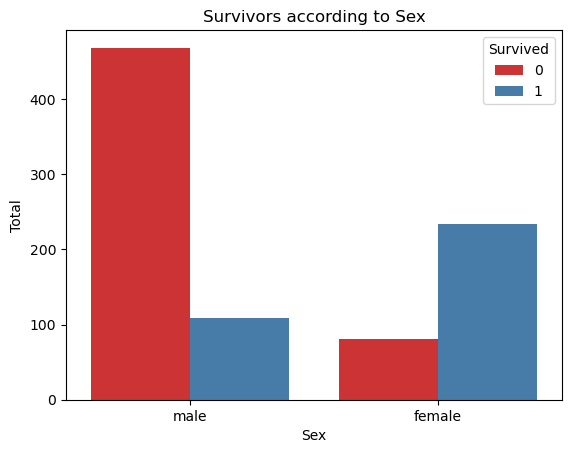

In [19]:
ax = sns.countplot(x="Sex", hue="Survived", palette="Set1", data=df)
ax.set(title="Survivors according to Sex", xlabel="Sex", ylabel="Total")

### Factorplot - looking at multiple columns

In [20]:
sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=df, aspect=0.9, size=3.5)

AttributeError: module 'seaborn' has no attribute 'factorplot'

Factorplot has since been changed to [catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html).
Specifying the plot "kind" parameter to "point" yields same output as "factorplot"

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


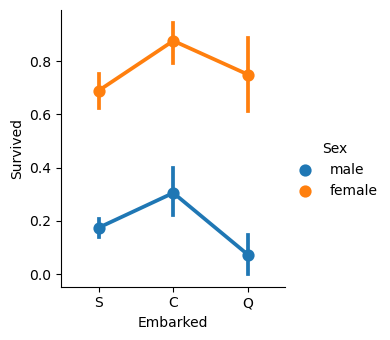

In [21]:
#sns.factorplot(x="Embarked", y="Survived", hue="Sex", data=df, aspect=0.9, height=3.5)
sns.catplot(kind="point", x="Embarked", y="Survived", hue="Sex", data=df, aspect=0.9, height=3.5)

---

## Variable Types

**Dependent vs Independent variable types**

- Categorical
    - Nominal - Any number of categories, order not important (eg male or female)
    - Ordinal - Order is important (eg educational background)
- Numerical
    - Discrete - Count, dice throwing, etc.
    - Continuous - Height of a person, weight, height of a tree, speed of a car.

# 4 Cs of data science

1. Correcting - Outliers, data seems incorrect
1. Completing - NULL values
1. Creating - Feature engineering, use existing features to create new ones that may be helpful
1. Converting - male = 1, female = 0